In [41]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Reshape, Input

In [42]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [43]:
x_train = x_train / 255
x_test = x_test / 255

x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

batch_size = 100

In [53]:
inp_img = Input((28, 28, 1))
x = Flatten()(inp_img)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
enc = Dense(49, activation='relu')(x)

t = Dense(64, activation='relu')(enc)
t = Dense(28 * 28, activation='sigmoid')(t)
dec = Reshape((28, 28, 1))(t)

autoencoder = keras.Model(inp_img, dec, name="autoencoder")
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=batch_size,
                shuffle=True)

n = 10

Epoch 1/20
600/600 [==============================] - 2s 2ms/step - loss: 0.0447
Epoch 2/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0210
Epoch 3/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0166
Epoch 4/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0145
Epoch 5/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0131
Epoch 6/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0121
Epoch 7/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0112
Epoch 8/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0107
Epoch 9/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0103
Epoch 10/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0099
Epoch 11/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0096
Epoch 12/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0093
Epoch 13/20
600/600 [====

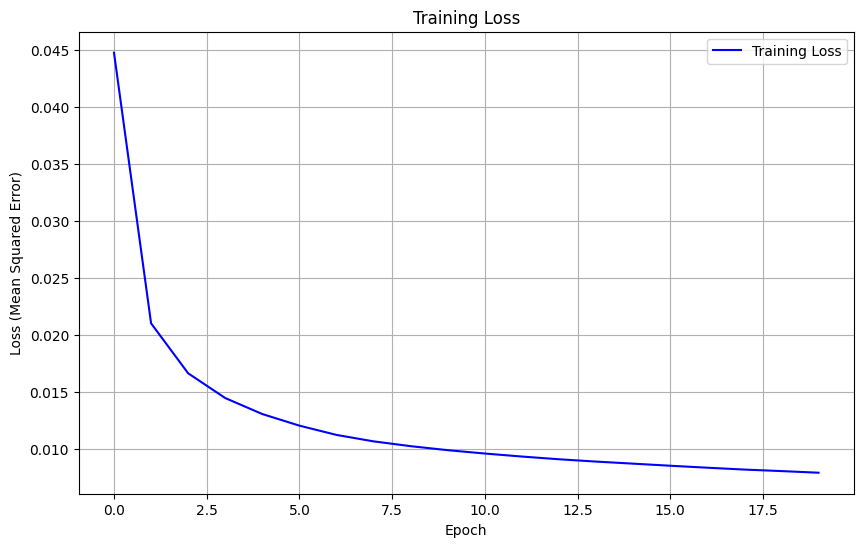

In [54]:
loss_history = autoencoder.history.history['loss']
epochs = range(len(loss_history))

plt.figure(figsize=(10, 6))
plt.plot(epochs, loss_history, 'b-', label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (Mean Squared Error)')
plt.legend()
plt.grid(True)
plt.show()

1/1 [==============================] - 0s 53ms/step


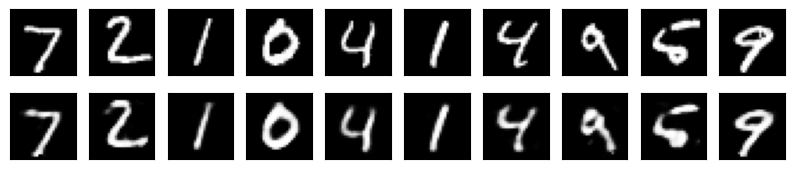

In [55]:
imgs = x_test[:n]
decoded_imgs = autoencoder.predict(x_test[:n], batch_size=n)

plt.figure(figsize=(n, 2))
for i in range(n):
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(imgs[i].squeeze(), cmap='gray')
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax2 = plt.subplot(2, n, i + n + 1)
  plt.imshow(decoded_imgs[i].squeeze(), cmap='gray')
  ax2.get_xaxis().set_visible(False)
  ax2.get_yaxis().set_visible(False)

plt.show()

def plot_digits(*images):
  images = [x.squeeze() for x in images]
  n = images[0].shape[0]

  plt.figure(figsize=(n, len(images)))
  for j in range(n):
    for i in range(len(images)):
      ax = plt.subplot(len(images), n, i * n + j + 1)
      plt.imshow(images[i][j])
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)

  plt.show()